# Corrections Management Tool (CMT)

This is a quick intro to CMT.

Corrections are a set of parameters to be applied at the event builder process to remove detectors effects, corrections are stored as pandas.DataFrame with a DatetimeIndex and housed at mongoDB. A general implementation about CMT can be found at strax, see for instance https://github.com/AxFoundation/strax/blob/master/strax/corrections.py and https://github.com/XENONnT/analysiscode/blob/master/StraxTests/corrections_strax_test.ipynb

This note explains how to use CMT via straxen and how you can set different versions of a given correction

In [1]:
import straxen

#### Call correction services

In [2]:
cmt=straxen.CmtServices()

#### Get electron lifetime for xenon1t run

In [3]:
cmt.get_elife('170204_1710','v1',True)

474859.6974259963

#### If user mistype a given version it would raise valueError

In [4]:
cmt.get_elife('170204_1710','vdas1',True)

ValueError: Global version vdas1 not found

#### Get PMT gains a.k.a as to_pe values for a given run (it would use the start time to find the data) 

In [4]:
cmt.get_pmt_gains('170204_1710','v1',True)

array([0.00701489, 0.        , 0.        , 0.00810555, 0.00438278,
       0.00788193, 0.00358062, 0.00751123, 0.00743156, 0.00483184,
       0.00707198, 0.00565603, 0.        , 0.00555947, 0.00795876,
       0.00703689, 0.00640406, 0.00808116, 0.00714394, 0.00743571,
       0.00715155, 0.00763603, 0.00396764, 0.00726161, 0.00540837,
       0.00739988, 0.        , 0.        , 0.00715983, 0.00727335,
       0.00422554, 0.00762081, 0.00413517, 0.00704631, 0.        ,
       0.00536619, 0.00742343, 0.00703481, 0.00454276, 0.00518346,
       0.00701137, 0.00543242, 0.00459376, 0.00733841, 0.0061342 ,
       0.00651856, 0.00758981, 0.00475848, 0.00747863, 0.00757543,
       0.00458526, 0.00460747, 0.007139  , 0.00801151, 0.00470327,
       0.008673  , 0.00374404, 0.00497367, 0.01036212, 0.00754385,
       0.00602822, 0.00839661, 0.        , 0.00449683, 0.00483235,
       0.        , 0.00766865, 0.00722537, 0.00356084, 0.00565691,
       0.00455742, 0.00788018, 0.00774203, 0.        , 0.00357

#### To Be Done: LCE maps and FDC maps

In [6]:
cmt.get_fdc('170204_1710',2,'v1',True)

NotImplementedError: 

#### Define a context config option for the PMT gains

In [14]:
st = straxen.contexts.xenon1t_dali()

In [15]:
st.set_config(dict(gain_model=('to_pe_constant',1.66,True)))

In [9]:
st.show_config('peaklets')

,option,default,current,applies_to,help
0,peaklet_gap_threshold,350,<OMITTED>,"(peaklets, lone_hits)",No hits for this many ns triggers a new peak
1,peak_left_extension,30,<OMITTED>,"(peaklets, lone_hits)",Include this many ns left of hits in peaks
2,peak_right_extension,200,30,"(peaklets, lone_hits)",Include this many ns right of hits in peaks
3,peak_min_pmts,4,2,"(peaklets, lone_hits)",Minimum number of contributing PMTs needed to ...
4,peak_split_gof_threshold,"(None, ((0.5, 1), (4, 0.4)), ((2, 1), (4.5, 0....","(None, ((0.5, 1), (3.5, 0.25)), ((2, 1), (4.5,...","(peaklets, lone_hits)",Natural breaks goodness of fit/split threshold...
5,peak_split_filter_wing_width,70,<OMITTED>,"(peaklets, lone_hits)",Wing width of moving average filter for low-sp...
6,peak_split_min_area,40,<OMITTED>,"(peaklets, lone_hits)",Minimum area to evaluate natural breaks criter...
7,peak_split_iterations,20,<OMITTED>,"(peaklets, lone_hits)",Maximum number of recursive peak splits to do.
8,diagnose_sorting,False,<OMITTED>,"(peaklets, lone_hits)",Enable runtime checks for sorting and disjoint...
9,gain_model,<OMITTED>,"(to_pe_constant, 1.66, True)","(peaklets, lone_hits)","PMT gain model. Specify as (model_type, model_..."


In [10]:
cte_gains= st.get_single_plugin('170204_1710', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

[1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66 1.66
 1.66 

#### Raise error if user provides wrong info in case of 'to_pe_constant' option

In [11]:
st.set_config(dict(gain_model=('to_pe_constant','www',True)))

In [12]:
cte_gains= st.get_single_plugin('170204_1710', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

ValueError: User specify a model type to_pe_constant and provide a <class 'str'> to be used

#### User can pass an array of pmt gains as in FIXED_TO_PE useful for Wsim

In [13]:
import numpy as np
n_gains = np.ones(248)

In [14]:
st.set_config(dict(gain_model=('to_pe_constant',n_gains,True)))

In [15]:
cte_gains= st.get_single_plugin('170204_1710', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
248


#### XENONnT example

In [3]:
st_online = straxen.contexts.xenonnt_online()

In [17]:
st_online.set_config(dict(gain_model=('to_pe_constant',0.666,False)))

In [18]:
cte_gains= st_online.get_single_plugin('007695', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

[0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666
 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.666 0.

#### Another example, xenon1t = False is the default option

In [19]:
st_online.set_config(dict(gain_model=('to_pe_constant',0.555)))

In [20]:
cte_gains= st_online.get_single_plugin('007700', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

[0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555
 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.555 0.

In [21]:
st_online.set_config(dict(gain_model=('to_pe_model','v1')))

In [22]:
cte_gains= st_online.get_single_plugin('008900', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

[0.00207461 0.0029107  0.00409832 0.00475588 0.00213808 0.00974096
 0.00188618 0.00214675 0.00254059 0.00221836 0.00182123 0.00203804
 0.00610783 0.00177334 0.00200844 0.0118618  0.00228994 0.00250502
 0.00305011 0.00399944 0.00195494 0.00492797 0.00251169 0.00217664
 0.00297015 0.00186536 0.00215708 0.00152251 0.00719306 0.00492332
 0.00254203 0.00240855 0.00299951 0.00708623 0.00302587 0.00299029
 0.00175981 0.00171852 0.00189652 0.00193252 0.0042109  0.00253864
 0.0036764  0.00432169 0.00357706 0.00318757 0.0038523  0.00217071
 0.0032398  0.00298736 0.00189316 0.00239973 0.00246985 0.00158808
 0.00249166 0.00489954 0.00252165 0.00281681 0.00274985 0.00177389
 0.00443942 0.00722755 0.00236978 0.00344986 0.00206722 0.0035709
 0.00291901 0.00188434 0.00210058 0.0037664  0.00168054 0.00197555
 0.00289798 0.00222375 0.00346131 0.00293204 0.00559086 0.00582588
 0.0033416  0.00291914 0.00411405 0.00269902 0.0018238  0.00432632
 0.00177479 0.0025445  0.00243336 0.00254343 0.0025212  0.00184

#### For early runs we will raise an error since data from gain model is not avaialbe 

In [23]:
cte_gains= st_online.get_single_plugin('005900', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

ValueError: to_pe(PMT gains) values are NaN, no data available for 005900 in the gain model with version v1, please set a cte values for 005900

#### If for some reason user mistype a runID it would raise an error

In [24]:
cte_gains= st_online.get_single_plugin('170204_1710', 'peaklets').to_pe
print(cte_gains)
print(len(cte_gains))

ValueError: run_id = 1702041710 not found

#### More on the electron lifetime

In [5]:
st.show_config('event_info')

,option,default,current,applies_to,help
0,trigger_min_area,100,<OMITTED>,"(events,)",Peaks must have more area (PE) than this to ca...
1,trigger_max_competing,7,<OMITTED>,"(events,)",Peaks must have FEWER nearby larger or slightl...
2,left_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the left from ea...
3,right_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the right from e...
4,n_top_pmts,253,127,"(peak_basics,)",Number of top PMTs
...,...,...,...,...,...
56,s2_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S2 relative LCE(x, y) map"
57,elife_model,<OMITTED>,<OMITTED>,"(corrected_areas,)","electron lifetime modelSpecify as (model_type,..."
58,g1,0.1426,<OMITTED>,"(energy_estimates,)",S1 gain in PE / photons produced
59,g2,31.2162,<OMITTED>,"(energy_estimates,)",S2 gain in PE / electrons produced


#### elife_model for xenon1t is the elife measurements 
#### elife_mode for xenonnt would be an elife time-dependent model??
#### Both have the option to defined an elife value (handy for WFsim)

In [6]:
elife_model=('elife_model','v1',True)
cmt.get_corrections_config('170204_1710','elife',elife_model)

474859.6974259963

In [7]:
elife_cte=('elife_constant',700000,True)
cmt.get_corrections_config('170204_1710','elife',elife_cte)

700000.0

In [8]:
st.set_config(dict(elife_model=('elife_file','v1',True)))

In [9]:
st.show_config('event_info')

,option,default,current,applies_to,help
0,trigger_min_area,100,<OMITTED>,"(events,)",Peaks must have more area (PE) than this to ca...
1,trigger_max_competing,7,<OMITTED>,"(events,)",Peaks must have FEWER nearby larger or slightl...
2,left_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the left from ea...
3,right_event_extension,1000000,<OMITTED>,"(events,)",Extend events this many ns to the right from e...
4,n_top_pmts,253,127,"(peak_basics,)",Number of top PMTs
...,...,...,...,...,...
56,s2_relative_lce_map,https://raw.githubusercontent.com/XENON1T/pax/...,<OMITTED>,"(corrected_areas,)","S2 relative LCE(x, y) map"
57,elife_model,<OMITTED>,"(elife_file, v1, True)","(corrected_areas,)","electron lifetime modelSpecify as (model_type,..."
58,g1,0.1426,<OMITTED>,"(energy_estimates,)",S1 gain in PE / photons produced
59,g2,31.2162,<OMITTED>,"(energy_estimates,)",S2 gain in PE / electrons produced


#### get_corrections_config() is what the plugins are going to use

In [26]:
gain_model=('to_pe_model','v1',True)
cmt.get_corrections_config('170204_1710','pmt_gains',gain_model)

array([0.00701488, 0.        , 0.        , 0.00810555, 0.00438278,
       0.00788193, 0.00358062, 0.00751123, 0.00743156, 0.00483184,
       0.00707198, 0.00565601, 0.        , 0.00555947, 0.00795876,
       0.00703689, 0.00640406, 0.00808116, 0.00714394, 0.00743571,
       0.00715155, 0.00763603, 0.00396764, 0.00726161, 0.00540837,
       0.00739988, 0.        , 0.        , 0.00715987, 0.00727335,
       0.00422554, 0.00762081, 0.00413517, 0.00704631, 0.        ,
       0.00536619, 0.00742343, 0.00703481, 0.00454276, 0.00518346,
       0.00701137, 0.0054324 , 0.00459376, 0.00733841, 0.0061342 ,
       0.00651856, 0.00758981, 0.00475848, 0.00747862, 0.00757543,
       0.00458526, 0.00460747, 0.007139  , 0.00801151, 0.00470327,
       0.008673  , 0.00374404, 0.00497367, 0.01036212, 0.00754385,
       0.00602822, 0.00839661, 0.        , 0.00449683, 0.00483235,
       0.        , 0.00766863, 0.00722537, 0.00356084, 0.00565691,
       0.00455742, 0.00788018, 0.00774203, 0.        , 0.00357

#### Test on mini_analysis implementation 

In [20]:
st = straxen.contexts.xenon1t_dali(build_lowlevel=False)

In [21]:
st.set_config(dict(gain_model=('to_pe_model','v1',True)))

/home/ahiguera-mx/.conda/envs/corrections/lib/python3.6/site-packages/straxen/analyses/waveform_plot.py:120: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cmap=plt.cm.inferno)


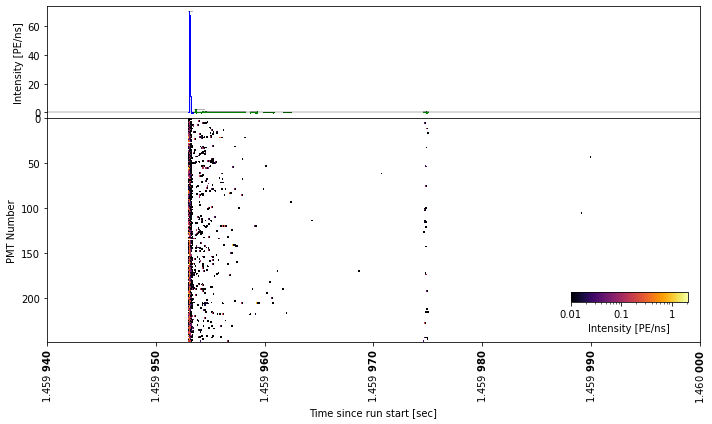

In [22]:
st.plot_waveform('170206_0116', seconds_range=(1.45994,1.46),deep=True)